## Importing Libraries

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load Dataset 

In [2]:
df = pd.read_csv("../data/retail_dataset.csv")
print("Initial data shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial data shape: (3160, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
df.head() # Get the first few rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,445922,87001,PARTY BUNTING,6,2011-12-30 00:00:00,9.87,13651.0,Spain
1,686801,38184,ASSORTED COLOUR BIRD ORNAMENT,-6,03-11-2011,9.21,NaN,United Kingdom
2,C484755,14642,LUNCH BAG RED RETROSPOT,8,"Sep 06, 2012",37.77,10820.0,EIRE
3,933160,73176,HOME DECOR LIGHT STRING,-8,29-03-2012,8.36,12713.0,United Kingdom
4,364954,35530,SCENTED CANDLE GIFT PACK,1,15-10-2012,4.97,17654.0,United Kingdom


In [ ]:
df.tail() # Get the last few rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3155,395673,74165,VINTAGE SNAKES & LADDERS,2,17/10/2011,10.55,10218.0,United Kingdom
3156,613214,62044,PLANT POTS GARDEN SET,5,09-18-2011,9.57,16833.0,United Kingdom
3157,948607,94766,ASSORTED COLOUR BIRD ORNAMENT,5,11/01/2012,4.80,13773.0,Switzerland
3158,259011,68249,JUMBO BAG RED RETROSPOT,4,09-07-2011,15.60,NaN,United Kingdom
3159,745190,19236,RETRO COFFEE MUG SET,-6,"Dec 26, 2010",9.25,11022.0,United Kingdom


In [ ]:
df.info() # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    3160 non-null   object 
 1   StockCode    3160 non-null   int64  
 2   Description  3160 non-null   object 
 3   Quantity     3160 non-null   int64  
 4   InvoiceDate  3160 non-null   object 
 5   UnitPrice    3160 non-null   float64
 6   CustomerID   2586 non-null   float64
 7   Country      3160 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 197.6+ KB


In [ ]:
df.describe() # Get statistical summary of numerical columns

,StockCode,Quantity,UnitPrice,CustomerID
count,3160.000000,3160.000000,3160.000000,2586.000000
mean,54403.577215,3.106962,10.672370,15058.224285
std,26681.618145,3.579949,7.286049,2898.387515
min,10005.000000,-9.000000,-1.000000,10010.000000
25%,30992.750000,1.000000,5.910000,12486.750000
50%,53850.000000,2.000000,8.800000,15082.000000
75%,78225.750000,5.000000,13.500000,17641.500000
max,99987.000000,28.000000,108.720000,19994.000000


## Data Cleaning 

In [ ]:
df = df.drop_duplicates() # Remove duplicate rows

In [ ]:
df = df.dropna(subset=['CustomerID']) # Drop rows with missing CustomerID

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce') # Convert InvoiceDate to datetime

In [ ]:
df = df.dropna(subset=['InvoiceDate']) # Drop rows with invalid InvoiceDate

In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C', na=False)] # Remove canceled transactions

In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce') # Convert Quantity to numeric
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce') # Convert UnitPrice to numeric
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] # Keep only positive Quantity and UnitPrice

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice'] # Calculate Revenue

In [ ]:
print("\n Data cleaned successfully!") 
print("Remaining rows:", df.shape[0])


 Data cleaned successfully!
Remaining rows: 400


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 3154
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    400 non-null    object        
 1   StockCode    400 non-null    int64         
 2   Description  400 non-null    object        
 3   Quantity     400 non-null    int64         
 4   InvoiceDate  400 non-null    datetime64[ns]
 5   UnitPrice    400 non-null    float64       
 6   CustomerID   400 non-null    float64       
 7   Country      400 non-null    object        
 8   Revenue      400 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 31.2+ KB


## Exploratory Data Analysis

In [ ]:
# Top-selling products by quantity EDA
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10) # Get top 10 products by quantity sold
print("\nTop 10 Products by Quantity Sold:") 
print(top_products_qty)


Top 10 Products by Quantity Sold:
Description
JUMBO BAG RED RETROSPOT                48
PARTY BUNTING                          31
SCENTED CANDLE GIFT PACK               31
  CERAMIC TEA POT FLORAL               30
 BIRTHDAY CARD VINTAGE DESIGN          29
WHITE HANGING HEART T-LIGHT HOLDER     28
 SET OF 3 CAKE TINS PANTRY DESIGN      28
 SCENTED CANDLE GIFT PACK              27
 WOODEN PICTURE FRAME WHITE FINISH     26
SET OF 3 CAKE TINS PANTRY DESIGN       25
Name: Quantity, dtype: int64


In [ ]:
# Top-selling products by revenue
top_products_rev = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10) # Get top 10 products by revenue
print("\nTop 10 Products by Revenue:")
print(top_products_rev)


Top 10 Products by Revenue:
Description
SET OF 3 CAKE TINS PANTRY DESIGN       577.33
SET OF 3 CAKE TINS PANTRY DESIGN       458.31
JUMBO BAG RED RETROSPOT                449.63
RETRO COFFEE MUG SET                   347.90
 SCENTED CANDLE GIFT PACK              345.65
VINTAGE SNAKES & LADDERS               337.11
 RETRO COFFEE MUG SET                  325.44
  CERAMIC TEA POT FLORAL               324.34
  WOODEN PICTURE FRAME WHITE FINISH    314.84
  VINTAGE SNAKES & LADDERS             311.52
Name: Revenue, dtype: float64


In [ ]:
# Sales trend over time (monthly)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp() # Extract month from InvoiceDate
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index() # Aggregate monthly sales

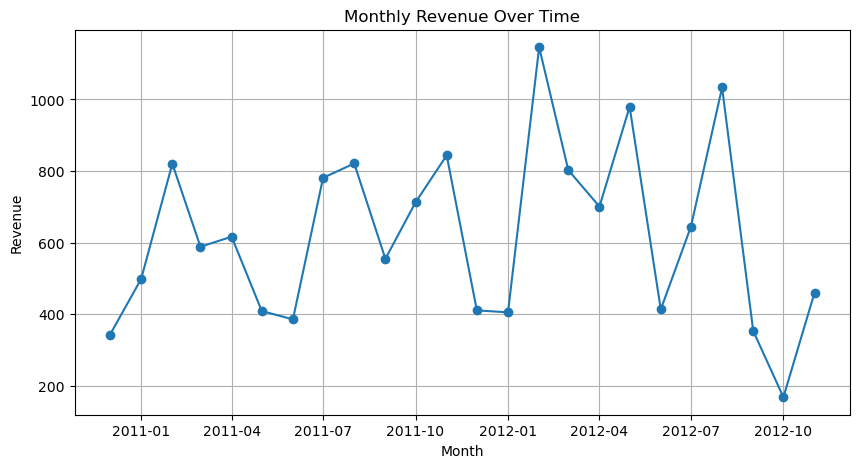

In [ ]:
plt.figure(figsize=(10,5)) # Plot monthly sales trend
plt.plot(monthly_sales['InvoiceMonth'], monthly_sales['Revenue'], marker='o') # Line plot
plt.title("Monthly Revenue Over Time") # Plot title
plt.xlabel("Month") # X-axis label
plt.ylabel("Revenue") # Y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

In [ ]:
# Top 10 countries by revenue
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10) # Aggregate sales by country
print("\nTop 10 Countries by Total Revenue:") # Print header
print(country_sales) # Print top 10 countries by revenue


Top 10 Countries by Total Revenue:
Country
United Kingdom    9327.76
Germany           1950.33
France             659.98
EIRE               535.55
Netherlands        483.89
Belgium            445.90
Spain              445.34
Portugal           419.52
Norway             200.49
Switzerland        167.23
Name: Revenue, dtype: float64


In [ ]:
# Key business metrics
total_revenue = df['Revenue'].sum() # Calculate total revenue
num_orders = df['InvoiceNo'].nunique() # Calculate number of unique orders
num_customers = df['CustomerID'].nunique() # Calculate number of unique customers

In [ ]:
aov = total_revenue / num_orders # Average Order Value
purchase_freq = num_orders / num_customers # Purchase Frequency
rev_per_customer = total_revenue / num_customers # Revenue per Customer


In [ ]:
print(f"\n Total Revenue: {total_revenue:,.2f}") # Print total revenue
print(f" Number of Orders: {num_orders}") # Print number of orders
print(f" Unique Customers: {num_customers}") # Print number of unique customers
print(f" Average Order Value (AOV): {aov:.2f}") # Print AOV
print(f" Purchase Frequency: {purchase_freq:.2f}") # Print purchase frequency
print(f" Revenue per Customer: {rev_per_customer:.2f}") # Print revenue per customer


 Total Revenue: 14,889.24
 Number of Orders: 400
 Unique Customers: 391
 Average Order Value (AOV): 37.22
 Purchase Frequency: 1.02
 Revenue per Customer: 38.08


## RFM Analysis

In [24]:
# Snapshot date = last purchase + 1 day
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

In [25]:
# Compute RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Revenue': 'sum'                                          # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [26]:
# Remove invalids
rfm = rfm[rfm['Monetary'] > 0]


In [ ]:
# Scoring each RFM metric
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int) # Higher recency gets higher score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int) # Frequency score
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int) # Monetary score

rfm['RFM_Sum'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1) # Total RFM score

In [ ]:
# Define segments
def assign_segment(row): # Define customer segments based on RFM_Sum
    if row['RFM_Sum'] >= 13: 
        return 'Loyal'
    elif row['RFM_Sum'] >= 9:
        return 'Potential'
    elif row['RFM_Sum'] >= 6:
        return 'At Risk'
    else:
        return 'Need Attention'

rfm['Segment'] = rfm.apply(assign_segment, axis=1) # Apply segment assignment

print("\n RFM segmentation complete. Segment counts:") # Print segment counts
print(rfm['Segment'].value_counts()) # Print segment counts


 RFM segmentation complete. Segment counts:
Segment
Potential         197
At Risk           131
Loyal              33
Need Attention     30
Name: count, dtype: int64


## Visualisations 

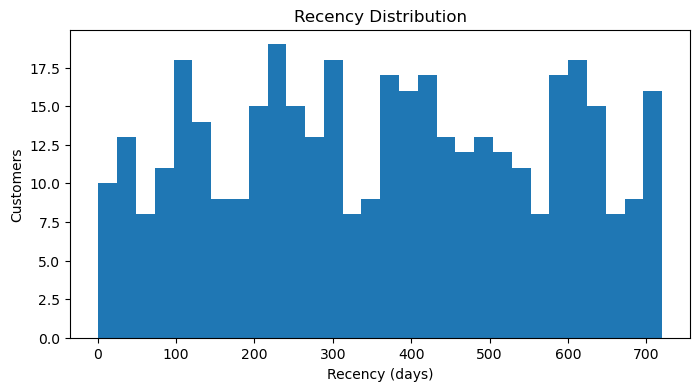

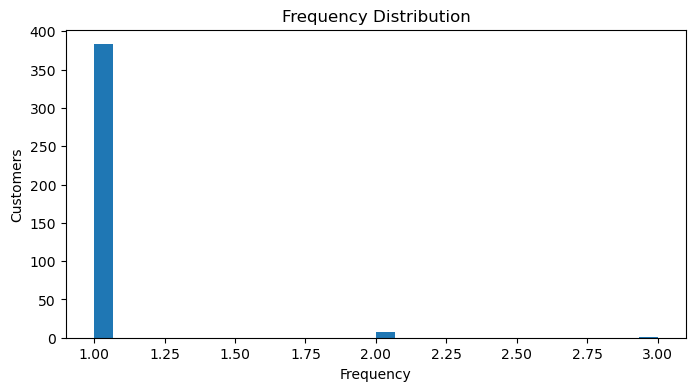

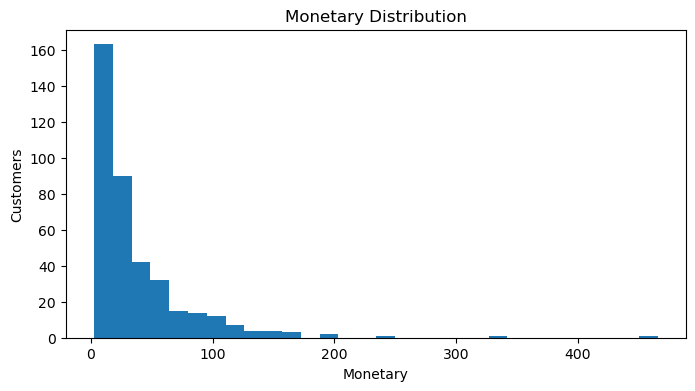

In [ ]:
plt.figure(figsize=(8,4)) # Recency distribution
plt.hist(rfm['Recency'], bins=30)
plt.title("Recency Distribution")
plt.xlabel("Recency (days)")
plt.ylabel("Customers")
plt.show()

plt.figure(figsize=(8,4)) # Frequency distribution
plt.hist(rfm['Frequency'], bins=30)
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Customers")
plt.show()

plt.figure(figsize=(8,4)) # Monetary distribution
plt.hist(rfm['Monetary'], bins=30)
plt.title("Monetary Distribution")
plt.xlabel("Monetary")
plt.ylabel("Customers")
plt.show()

## CLUSTERING MODEL (KMEANS)


In [ ]:
# Prepare scaled RFM data
rfm_scaled = StandardScaler().fit_transform(rfm[['Recency', 'Frequency', 'Monetary']]) # Scale RFM metrics

## Elbow Method 

In [ ]:
# Elbow Method to find optimal K 
inertias = [] # List to store inertia values
K = range(1, 11) # Range of K values
for k in K: # Iterate over K values
    km = KMeans(n_clusters=k, random_state=42, n_init=10) # KMeans model
    km.fit(rfm_scaled) # Fit model
    inertias.append(km.inertia_) # Store inertia

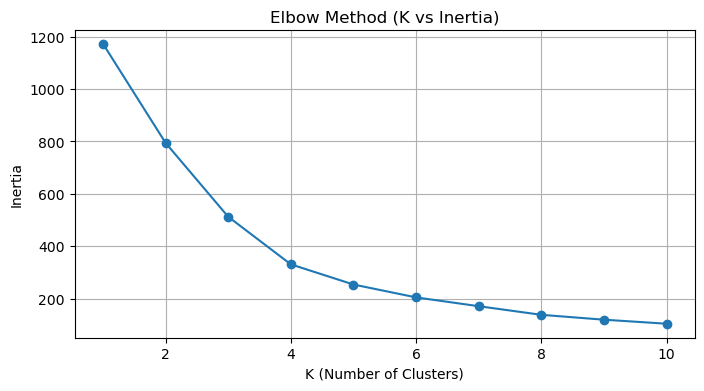

In [ ]:
plt.figure(figsize=(8,4)) # Plot Elbow Method
plt.plot(K, inertias, marker='o') # Plot inertia vs K
plt.title("Elbow Method (K vs Inertia)") # Plot title
plt.xlabel("K (Number of Clusters)") # X-axis label
plt.ylabel("Inertia") # Y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

In [ ]:
# Choose K manually from the elbow (e.g., K=4)
chosen_k = 4 # Set chosen number of clusters
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=50) # KMeans model
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled) # Assign clusters to customers

In [ ]:
print("Clustering complete. Cluster counts:") # Print cluster counts
print(rfm['Cluster'].value_counts()) # Print cluster counts

Clustering complete. Cluster counts:
Cluster
2    180
3    167
1     36
0      8
Name: count, dtype: int64


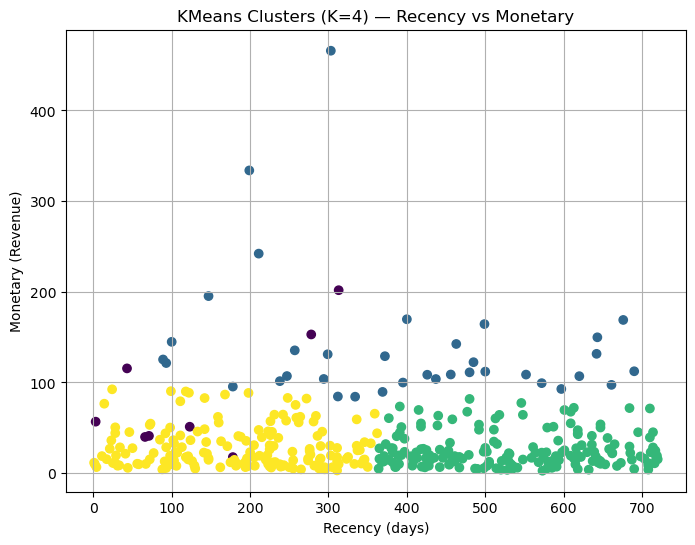

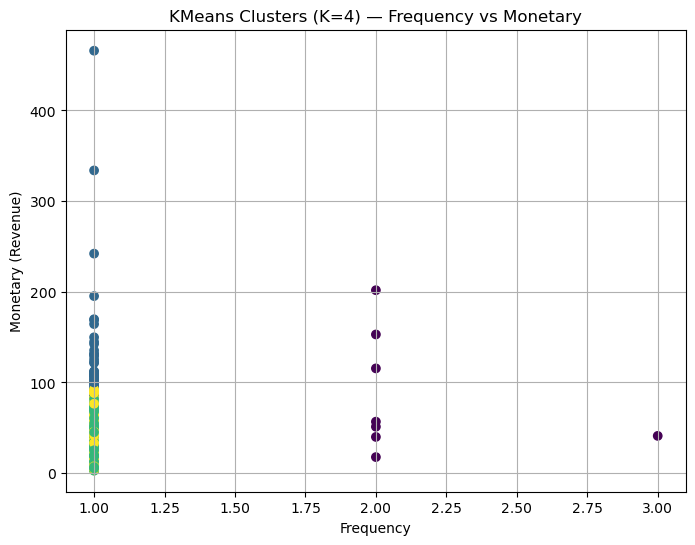

In [ ]:
# Cluster Visualization
plt.figure(figsize=(8,6)) # Plot Recency vs Monetary with clusters
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster']) # Scatter plot
plt.title(f"KMeans Clusters (K={chosen_k}) — Recency vs Monetary") # Plot title
plt.xlabel("Recency (days)") # X-axis label
plt.ylabel("Monetary (Revenue)") # Y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

plt.figure(figsize=(8,6)) # Plot Frequency vs Monetary with clusters
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster']) # Scatter plot
plt.title(f"KMeans Clusters (K={chosen_k}) — Frequency vs Monetary") # Plot title
plt.xlabel("Frequency") # X-axis label
plt.ylabel("Monetary (Revenue)") # Y-axis label
plt.grid(True) # Show grid
plt.show() # Display the plot

## Actionable Insights

In [ ]:
print("\n Actionable Insights:") # Print actionable insights based on segments
print(" Loyal customers generate the highest total revenue and purchase frequently.") # Print insight
print("   → Strategy: Reward loyalty with VIP programs, exclusive early access, or referral bonuses.") # Print strategy

print("\n 'At Risk' customers purchased well in the past but haven’t engaged recently.")
print("   → Strategy: Launch win-back campaigns, 'We miss you' discounts, or personalized product reminders.")

print("\n 'Potential' customers show moderate purchase activity — strong candidates for upselling.")
print("   → Strategy: Offer product bundles, cross-sell recommendations, or loyalty points to encourage repeat purchases.")

print("\n 'Need Attention' customers are new or low-engagement buyers.")
print("   → Strategy: Use welcome offers or first-purchase follow-ups to convert them to repeat buyers.")


 Actionable Insights:
 Loyal customers generate the highest total revenue and purchase frequently.
   → Strategy: Reward loyalty with VIP programs, exclusive early access, or referral bonuses.

 'At Risk' customers purchased well in the past but haven’t engaged recently.
   → Strategy: Launch win-back campaigns, 'We miss you' discounts, or personalized product reminders.

 'Potential' customers show moderate purchase activity — strong candidates for upselling.
   → Strategy: Offer product bundles, cross-sell recommendations, or loyalty points to encourage repeat purchases.

 'Need Attention' customers are new or low-engagement buyers.
   → Strategy: Use welcome offers or first-purchase follow-ups to convert them to repeat buyers.


In [ ]:
# Campaign recommendation
print("\n Recommended Target Segment for Next Campaign:") # Print recommended target segment
print("→ 'Potential' customers: easiest to convert to Loyal with personalized offers and upselling campaigns.") # Print recommendation


 Recommended Target Segment for Next Campaign:
→ 'Potential' customers: easiest to convert to Loyal with personalized offers and upselling campaigns.
